# CinemaScore Prediction Model
## jupyter interface

This model searches the database of Rotten Tomatoes reviews
and iteratively fits a unique XGBoost model for each 
combination of critics supplied by the user, assuming at 
least 50 films to train on. The model then outputs the 
distribution of all CinemaScore predictions.

Developed by Daniel Cusworth (dcusworth@legendary.com; dcusworth@fas.harvard.edu)


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from IPython.display import Image
from class_func import *
import os, sys
import pickle

## Step 1: Scrape reviews of film you want to predict

### Input below the url slug of the film to scrape.
Must be of form: https://www.rottentomatoes.com/m/FILM_SLUG_HERE

In [2]:
################ SCRAPE ROTTENTOMATOES REVIEWS #######################

#INPUT FILM URL BELOW:

film_slug = 'https://www.rottentomatoes.com/m/wonder_woman_2017'


######################################################################
#The scraper will now be run - DON'T MODIFY BELOW

run_command = './user_input/film_review_scraper.py -u ' + film_slug
%run $run_command
mv_file = os.system("mv review_input.csv ./user_input/review_input.csv")

### Inspect webscrape to see if done properly

If there are any issues, manually clean up the file 'review_input.csv' located in the director 'user_input'

In [3]:
with open('user_input/review_input.csv', 'r') as txt:
    print txt.read()

critic,val
Luke Buckmaster,0.0
Prairie Miller,1.0
Allison Shoemaker,0.75
Susan Granger,0.9
Jenna Busch,0.916666666667
Rosie Fletcher,0.6
Sheri Linden,1.0
Uri Klein,1.0
Mark Hughes,1.0
Alonso Duralde,1.0
Chris Hewitt (UK),0.8
Molly Freeman,0.8
Mara Reinstein,1.0
William Bibbiani,1.0
Joshua Yehl,0.79
Angie Errigo,0.8
Stefan Pape,0.8
Scott Mendelson,0.7
Chris Stuckmann,0.833333333333
Peter Travers,0.625
Fred Topel,1.0
Dave Schilling,1.0
Rodrigo Perez,0.5
Chris Hunneysett,0.8
Anthony O'Connor,0.8
Matthew Turner,0.8
Kristy Puchko,1.0
Edward Douglas,0.85
David Jenkins,0.6
Stephen Whitty,0.875
Lindsey Bahr,1.0
Angie Han,1.0
Wenlei Ma,0.7
Julian Roman,0.7
Alison Willmore,1.0
Matthew Pejkovic,0.8
Simon Miraudo,0.8
Katie Walsh,0.875
Garth Franklin,1.0
Emma Simmonds,0.8
Mark Daniell,0.8
Tom Gliatto,1.0
Ben Sin,0.7
Matt Singer,0.7
Harry Guerin,0.7
Kate Erbland,0.833333333333
Donald Clarke,0.6
Robbie Collin,0.8
Matt Prigge,0.6
Michael Phillips,0.875
John Hazelton,1.0
Roger Moore,0.625
Travis Hopson

## Step 2: Add associated metadata to model

Input genre and month of release to the film you are predicting. 

There are two genre categories - short and long genre. You must select and copy exactly the genre that most closely matches the genre of the film you are predicting.

**Short Genre**

'prestige', 'family', 'horror', 'sequel', 'other', 'action', 'comedy', 'pulp'

**Long Genre**

'Sci-Fi', 'Anthology', 'Sports', 'Crime', 'Romance', 'Supernatural', 'Comedy', 'War', 'Teen', 'Biopic', 'Horror', 'Sequel', 'Western', 'Thriller', 'Adventure', 'Mystery', 'Foreign', 'Drama', 'Historical', 'Remake', 'Action', 'Animated', 'Documentary', 'Musical', 'Spy', 'Family', 'Romantic Comedy', 'Period', 'Fantasy', 'Adaptation', 'Children'



In [4]:
################ ADD METDATA #######################

#ADD MONTH OF RELEASE BELOW

month_of_release = 6

#ADD SHORT GENRE

short_genre = 'action'

#ADD LONG GENRE

long_genre = 'Adventure'


#####################################################
#Metadata will now be updated - DON'T MODIFY BELOW

meta_array = np.asarray([long_genre, short_genre, month_of_release]).reshape(1,3)
meta_df = pd.DataFrame(meta_array, columns=['ngenre','nshort_genre','month'])
meta_df.to_csv('./user_input/metadata_input.csv', index=False)

## Step 3: Run the model

The model has 2 main running options

** Option 1 (MAX_CRITIC): Maximum number of critics to use **

If review_input.csv has more critics than MAX_CRITIC, then only the “top” N (N = MAX_CRITIC) critics are considered. Here, “top” is defined as critics with a large number of reviews who are correlated with CinemaScore. Default is 15

** Option 2 (MIN_THRES): Minimum number of common films to fit a model **

The dynamic prediction model fits a unique XGBoost model on each combination of unique critics supplied in 'review_input.csv.' This option determines how many common films must exist per combination in order for an individual model to be fit. Default is 50.


In [5]:
############## RUN OPTIONS #################

#Option 1 (MAX_CRITIC): Maximum number of critics to use

MAX_CRITIC = 10

#Option 2 (MIN_THRES): Minimum number of common films to fit a model

MIN_THRES = 50

** Running the model **

Once the options are selected, you can run the model. The model will first look at the 'review_input.csv' list that was provided and match those names with the names in the training set. If not all the user supplied critics are contained in the training set, the model will show the discrepancies before fitting the model. It will also output the closest string matches of the supplied critics to critics in the dataset. Thus if there is a simple spelling error, the user can manually modify 'review_input.csv' before running the model.

For the case of mispellings, consult the file 'critics_in_dataset.csv' located in the 'ancillary_data' directory for the training set spellings/punctuation of critics. 

**You will be prompted to press ENTER once the model has looked over the inputted critics **

In [6]:
################ RUN THE MODEL #######################

#DO NOT NEED TO MODIFY ANYTHING HERE, JUST RUN CELL
os.system("rm ./results/Prediction_Results.txt")
ipython_run_model(MAX_CRITIC, MIN_THRES)

//anaconda/lib/python2.7/site-packages/pandas/tools/merge.py:624: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  rlab = rizer.factorize(rk)
//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)




-----------------------------------

Some inputted critics are not contained in the dataset. Below are the user inputted critics and closest matches found in the training set.

Please check for spelling inconsistencies and update the 'review_input.csv' file accordingly:


              User Input      Closest Match
0      Allison Shoemaker     Alison Gillmor
1              Uri Klein         Eric Melin
2            Mark Hughes       David Hughes
3         Dave Schilling       Dan Schindel
4          Molly Freeman       Molly Eichel
5            Joshua Yehl          Josh Bell
6       Chris Hunneysett  Chris Hewitt (UK)
7       Anthony O'Connor    Austin O'Connor
8              Angie Han       Angie Errigo
9          Andrew Barker      Andrew Pulver
10        Garth Franklin      Frank Wilkins
11          Mark Daniell         Rob Daniel
12           Tom Gliatto        Tom Glasson
13               Ben Sin        Brent Simon
14      Abigail Chandler       Al Alexander
15         John Hazel

## Step 4: Summarize Visualize Results

Plots are summary text are saved in the directory 'results.' Run the following cells to visualize the output.

**CinemaScore above baseline**

Only models who beat the genre+release month baseline model are summarized

**CinemaScore all models**

All fitted models are summarized.

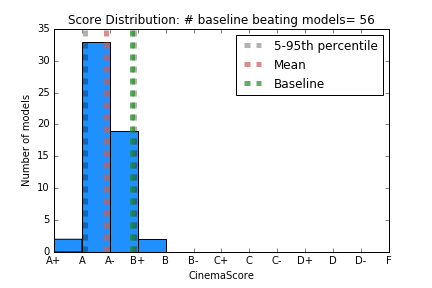

In [7]:
Image("results/CinemaScore_above_baseline.png")

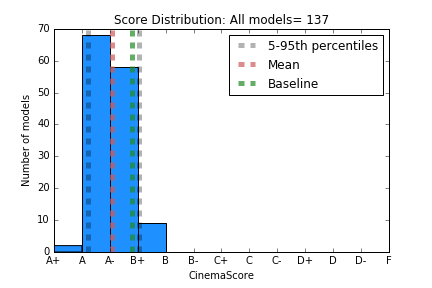

In [8]:
Image("results/CinemaScore_all_models.png")

In [9]:
with open('results/Prediction_Results.txt', 'r') as txt:
    print txt.read()


------- CINEMASCORE DYNAMIC PREDICTION RESULTS ------

The critic(s) 

['Allison Shoemaker', 'Uri Klein', 'Mark Hughes', 'Dave Schilling', 'Molly Freeman', 'Joshua Yehl', 'Chris Hunneysett', "Anthony O'Connor", 'Angie Han', 'Andrew Barker', 'Garth Franklin', 'Mark Daniell', 'Tom Gliatto', 'Ben Sin', 'Abigail Chandler', 'John Hazelton', 'Don Kaye', 'Scott Menzel', 'Alicia Lutes', 'Alex Abad-Santos', 'Kelly Lawler', 'Conner Schwerdtfeger']

are not contained in the training set and were excluded from the model

The following critics were used to during fitting: 

[u'Susan Granger', u'Roger Moore', u'Julian Roman', u'Matthew Turner', u'Emma Simmonds', u'JimmyO', u'Matthew Pejkovic', u'Peter Travers', u'Michael Phillips', u'Chris Nashawaty']

Size of training set: 1638

Potential models: 228
Time to fit: 4.43 seconds
Baseline (Genre + Month of Release) Prediction: 2.8

------------ Baseline - beating models --------------
Models fit: 56
Mean CinemaScore prediction: 1.86
5th Percentile Cin